 **topic** : `Survey the dynamic sampling techniques described in references [28,73] of Bottou et al (section 5.2.1). Implement and test at least one of them (including the basic one described in section 5.2.1).` 

# Library

In [11]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Data For the sake of the study data have been generate

In [2]:
X,y = make_regression(n_samples = 1500000, n_features = 1000)

print("Shape of X: ", X.shape)
print("Shape of y : ", y.shape)

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X:  (1500000, 1000)
Shape of y :  (1500000,)
Shape of X_train : (1200000, 1000)
Shape of y_train : (1200000,)
Shape of X_test : (300000, 1000)
Shape of y_test : (300000,)


# Notations :

**Objective / Loss function :**

prediction function:
$$ f(w;x) = w^Tx $$ $ w \in R^d$ , $ x \in R^{N x d}$

response variable
$$ y $$ 

Loss fonction (least squared error) : 
$$ l(f(w;x_{i}),y_{i}) = (f(w;x_{i}) - y_{i})^2$$ $ i \in $\{ 1; N }$ $

Objective function :
$$J(w)=\frac{1}{N}\sum_{i=1}^{N} l(f(w;x_{i}),y_{i})$$

$$J_{S_{k}}(w_{k})=\frac{1}{\mid S \mid}\sum_{i\in S} l(f(w;x_{i}),y_{i})$$

Gradient objective function :
$$\nabla J(w)=\frac{1}{N}\sum_{i=1}^{N} \nabla l(f(w;x_{i}),y_{i})$$

$$\nabla J_{S_{k}}(w_{k})=\frac{1}{\mid S \mid}\sum_{i\in S} \nabla l(f(w;x_{i}),y_{i})$$

**Sample variance** (3.6)

$$ l(w;i) = l(f(w;x_{i}),y_{i})$$

$$ Var_{i \in S}(\nabla l(w;i)) = \frac{1}{\mid S\mid - 1}\sum_{i\in S}(\nabla l(w;i) - \nabla J_{S}(w))^2$$

**Condition** (3.9)

$$\frac{\parallel Var_{i \in S}(\nabla l(w;i)) \parallel_{1}}{\mid S \mid}  \leq \theta^2 \parallel \nabla J_{S}(w)\parallel^2_{2} $$

**formula** (3.12)

$$ \mid S_{hat} \mid = \frac{\parallel Var_{i \in S}(\nabla l(w;i)) \parallel_{1}}{\theta^2 \parallel \nabla J_{S}(w) \parallel^2_{2}}$$

$$ g(w_{k}, \xi_{k}) := \frac{1}{n_{k}} \sum_{i \in S_{k}} \nabla f(w_{k}; \xi_{k,i}) $$ 


$$ \varphi_{k} := \frac{trace(Cov(\{ \nabla f(w_{k}; \xi_{k,i})\}_{i \in S_{k}}))}{n_{k}}$$


**Algorithm 3.1 : Dynamic Sample Gradient Algorithm**

Choose an initial iterate $w_{0}$, an initial sample $S_{0}$, and a constant $\theta \in (0,1)$

Set $k$ $\leftarrow$ 0

**Repeat** until a convergence test is satisfied:

 1. Compute $d_{k} = -\nabla J_{S_{k}}(w_{k})$
 2. Line Search: compute steplength $\alpha_{k} > 0$ such that : 
 
 $J_{S_{k}}(w_{k} + \alpha_{k}d_{k}) < J_{S_{k}}(w_{k})$
 
 
 3. Define a new iterate: $w_{k+1} = w_{k} + \alpha_{k}d_{k}$
 4. Set $k \leftarrow K+1$
 5. Choose a sample $S_{k}$ such that $\mid S_{k}\mid = \mid S_{k-1}\mid$
 6. Compute the sample variance defined in (3.6)
 7. If condition (3.9) is not satisfied, augment $S_{k}$ using formula (3.12)

**Algorithm 5.2.1 : Dynamic Sampling**

Choose an initial $w_0$, a, initial $n_0$, $\chi \in [0,1)$, an initial $\alpha$ > 0 and an initial sample_size $n_k$

Set k $\leftarrow$ 0

Repeat until a convergence test is satisfied:

 1. Select randomly a sample size large enough
 2. Test $ \varphi_{k} \leq \chi^2 \parallel g(w_{k}, \xi_{k} ) \parallel^2_{2} $
 
 3. If condition is not satisfied, then increase the sample size
 
 3. Otherwise define a new iterate: $w_{k+1} = w_{k} + \alpha_{k}d_{k}$
 
 



# Function

$ \nabla J_{S_{k}}(w_{k})$

In [3]:
# dk = GradientJsk(wk)
def objective_gradient_(X,y,w):
    '''
     X data belong to R^n*d
     y response variable belong to R^n
     w parameter belong to R^d
    '''
    n = X.shape[0]
    
    predictions = np.dot(X,w)
    X_transpose = X.transpose()
    gradient = (2/n)*(np.dot(X_transpose,(predictions-y)))
    return gradient


$ J_{S_{k}}(w_{k})$
 
 

In [4]:
def objective_function(X,y,w):
    '''
     X data belong to R^n*d
     y response variable belong to R^n
     w parameter belong to R^d
    '''
    n = X.shape[0]
    predictions = np.dot(X,w)
    loss = (1/n)*np.sum(np.square(predictions-y))
    return loss

$ Var_{i \in S}(\nabla l(w;i)) = \frac{1}{\mid S\mid - 1}\sum_{i\in S}(\nabla l(w;i) - \nabla J_{S}(w))^2$

In [5]:
def loss_gradient(X,y,w):
    predictions = np.dot(X,w)
    grad_loss = 2*(predictions - y)
    return grad_loss

def sample_variance(X,y,w):
    
    grad = loss_gradient(X,y,w)
    dk = objective_gradient_(X,y,w)
    var = []
    for i in range(len(dk)):
        var.append(np.sum(np.square(2*grad*X[:,i] - dk[i])))
    var = np.array(var)
    var = 1/(X.shape[0]-1)*var 

    return var

Prediction function

In [6]:
def predict_1(X_test, w1):
    n = X_test.shape[0]
    X = np.mat(X_test) # convert X into matrix to be able to use * as matrix product
    w1 = w1.reshape(-1,1)
    w1 = np.mat(w1)
    global y_pred
    y_pred = X*w1
    return y_pred

$ \{ \nabla f(w_{k}; \xi_{k,i})\}_{i \in S_{k}}$

In [7]:
def set_grad(X,y,w):
    len_x = X.shape[0]
    array = np.ones((len(w),X.shape[0]))
    for i in range(len_x):
         array[:,i] = objective_gradient_(X[i,:],y[i],w)
    return array

# Algorithm

## Dynamic sampling ( Algo from article 3.1 )

In [8]:
def dynamic_sampling(X_train, y_train, X_test, y_test, iteration=200,sample_size=2,lr=0.001, alp=0.05, Theta=0.90):

    
    "X_train : training set without response variable"
    "y_train : training response variable "
    
    "X_test,y_test  : set to compute the prediction and evaluate  the model"
    
    "iteration : number of epoch"
    
    "sample_size : the initial batch size, has to be greater or equal than two,"
    "if you wander why, have a look to function sample_variance, (hint : you can't divide by 0)"
    
    "learning rate : I will advise you to not choose it to large, cause the dynamic algorithm"
    " will update it if need "
    
    " The stepsize to increase the learning rate"
    
    "Theta : belong to (0,1)"
    "Remark : for some value of theta, it could lead to the crash of the computation"
    # step :

    # choose an initial iterate w that belong to X_train.shape[1]
    w = np.random.rand(X_train.shape[1])

    # Choose an initial sample S
    sample_size = 2
    number_of_rows = X_train.shape[0]
    random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
    S = X_train[random_indices,:]
    ys = y_train[random_indices]

    # Choose a constant theta that belong to (0,1)
    #theta = np.random.rand()
    theta = Theta

    # Metric measure : MSE
    mse_history = []
    pred = predict_1(X_test,w)
    mse = mean_squared_error(y_test,pred)
    print("epoch :",0, "mse :",mse , " sample size :", sample_size)
    #print(mse)
    mse_history.append(mse)

    # Repeat until convergence test is satisfied | convergence test mse <= 0.001
    #while mse >= 0.001 :
    for i in range(iteration-1):
        # Compute dk  (objective function gradient J)
        dk = -objective_gradient_(S,ys,w)

        # Line Search : compute steplength alpha > 0 such that
        # J(w + alpha*dk) < j(w)
        alpha = lr
        Js = objective_function(S,ys,w)
        Jsk = objective_function(S,ys,w+alpha*dk)

        # Warning Have a look about the equality
        while Jsk < Js:
            alpha = alpha + alp
            Jsk = objective_function(S,ys,w+alpha*dk)

        # Define a new iterate w = w + alpha*dk
        w= w + alpha*dk

        # Choose a sample S of same size
        number_of_rows = X_train.shape[0]
        random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
        S = X_train[random_indices,:]
        ys = y_train[random_indices]

        #Compute the sample variance defined in (3.6)
        var = sample_variance(S,ys,w)

        # If condition (3.9) is not satisfied, augmente S using formula (3.12)
        A = np.sum(np.abs(var))/S.shape[0]
        B = np.square(theta)*(np.sum(np.square(objective_gradient_(S,ys,w))))

        if A <= B:
            sample_size = sample_size
        else :
            sample_size = int((np.sum(np.abs(var)))/ (np.square(theta)*(np.sum(np.square(objective_gradient_(S,ys,w))))))

        pred = predict_1(X_test,w)
        mse = mean_squared_error(y_test,pred)
        mse_history.append(mse)
        print("epoch :",i+1, "mse :",mse, " sample size :", sample_size)
    return mse_history

In [9]:
mse_ds = dynamic_sampling(X_train, y_train, X_test, y_test)

epoch : 0 mse : 39973.846507550064  sample size : 2
epoch : 1 mse : 413386.03976466827  sample size : 12
epoch : 2 mse : 893957.9675097819  sample size : 58
epoch : 3 mse : 1303808.1999130303  sample size : 276
epoch : 4 mse : 1613516.2180495975  sample size : 1027
epoch : 5 mse : 1566293.853326883  sample size : 2533
epoch : 6 mse : 1231521.3876816316  sample size : 3457
epoch : 7 mse : 812981.2845285247  sample size : 3761
epoch : 8 mse : 628057.7838092594  sample size : 3940
epoch : 9 mse : 412073.8770694923  sample size : 4060
epoch : 10 mse : 310337.1176360255  sample size : 4060
epoch : 11 mse : 191298.807392984  sample size : 4060
epoch : 12 mse : 135465.74833413842  sample size : 4110
epoch : 13 mse : 97832.26706269359  sample size : 4110
epoch : 14 mse : 63078.5247243802  sample size : 4110
epoch : 15 mse : 45623.44086091488  sample size : 4110
epoch : 16 mse : 30494.044927513783  sample size : 4110
epoch : 17 mse : 23249.471141110032  sample size : 4110
epoch : 18 mse : 15441

epoch : 142 mse : 6.3337152019414e-17  sample size : 4122
epoch : 143 mse : 4.550347045017389e-17  sample size : 4122
epoch : 144 mse : 3.247448400776073e-17  sample size : 4122
epoch : 145 mse : 2.132897957993353e-17  sample size : 4122
epoch : 146 mse : 1.4847450665747436e-17  sample size : 4122
epoch : 147 mse : 9.884202296572987e-18  sample size : 4122
epoch : 148 mse : 6.3420147943669286e-18  sample size : 4122
epoch : 149 mse : 4.0310031812544744e-18  sample size : 4122
epoch : 150 mse : 2.636733424473334e-18  sample size : 4122
epoch : 151 mse : 1.8397634650523203e-18  sample size : 4122
epoch : 152 mse : 1.2761532601760993e-18  sample size : 4122
epoch : 153 mse : 8.829183107496892e-19  sample size : 4122
epoch : 154 mse : 5.942154921951798e-19  sample size : 4122
epoch : 155 mse : 4.702043718409213e-19  sample size : 4122
epoch : 156 mse : 3.1502152602158197e-19  sample size : 4122
epoch : 157 mse : 2.1047442702882175e-19  sample size : 4122
epoch : 158 mse : 1.592035978344453

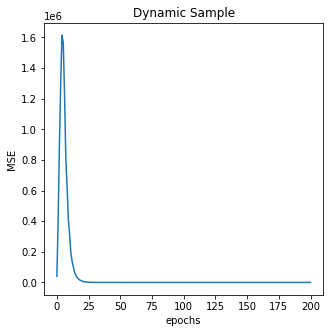

In [12]:
xplot = np.linspace(start = 0, stop = len(mse_ds),num = len(mse_ds))
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(xplot, mse_ds)
plt.xlabel("epochs")
plt.ylabel('MSE')
plt.title("Dynamic Sample")
plt.show()

## Full-Batch  Gradient

In [13]:
def full_batch(X_train,y_train,X_test,y_test,lr=0.005,iteration=200):
    
    #FULL-BATCH GRADIENT DESCENT

    #Step : 

    # choose an initial iterate w that belong to X_train.shape[1]
    w = np.random.rand(X_train.shape[1])
    # Initialise the learning rate
    alpha = lr
    # Metric measure : MSE
    mse_history = []
    pred = predict_1(X_test,w)
    mse = mean_squared_error(y_test,pred)
    mse_history.append(mse)
    print("epoch :",0, "mse :",mse)

    for i in range(iteration-1):

            # Gradient descent 
            dk = objective_gradient_(X_train,y_train,w)
            w = w - alpha*dk
            pred = predict_1(X_test,w)
            mse = mean_squared_error(y_test,pred)
            print("epoch :",i+1, "mse :",mse)
            mse_history.append(mse)
    return mse_history

In [14]:
mse_fb = full_batch(X_train,y_train,X_test,y_test)

epoch : 0 mse : 39923.50200198766
epoch : 1 mse : 39130.139798613185
epoch : 2 mse : 38352.55569826176
epoch : 3 mse : 37590.43566548926
epoch : 4 mse : 36843.471920078686
epoch : 5 mse : 36111.362812345615
epoch : 6 mse : 35393.81270093127
epoch : 7 mse : 34690.53183303348
epoch : 8 mse : 34001.236227027104
epoch : 9 mse : 33325.64755742595
epoch : 10 mse : 32663.49304213975
epoch : 11 mse : 32014.505331979897
epoch : 12 mse : 31378.422402369633
epoch : 13 mse : 30754.98744721423
epoch : 14 mse : 30143.948774888184
epoch : 15 mse : 29545.059706297296
epoch : 16 mse : 28958.078474973932
epoch : 17 mse : 28382.768129165237
epoch : 18 mse : 27818.89643587405
epoch : 19 mse : 27266.235786814188
epoch : 20 mse : 26724.563106241138
epoch : 21 mse : 26193.659760621314
epoch : 22 mse : 25673.31147010292
epoch : 23 mse : 25163.308221752457
epoch : 24 mse : 24663.444184521708
epoch : 25 mse : 24173.51762591058
epoch : 26 mse : 23693.330830292096
epoch : 27 mse : 23222.690018866164
epoch : 28 ms

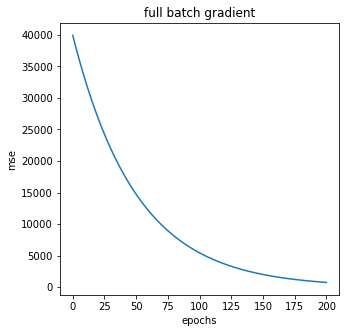

In [15]:
x = np.linspace(start = 0, stop = len(mse_fb), num = len(mse_fb))
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x, mse_fb)
plt.xlabel("epochs")
plt.ylabel("mse")
plt.title("full batch gradient")
plt.show()

## Stochastic Batch Gradient

In [16]:
def stochastic_batch(X_train,y_train,X_test,y_test,lr=0.005, batch = 50, iteration = 200):
    
    # STOCHASTIC BATCH GRADIENT DESCENT

    # step :

    # choose an initial iterate w that belong to X_train.shape[1]
    w = np.random.rand(X_train.shape[1])
    
    mse_history = []
    
    # for k = 1,2,... do:
    for i in range(iteration):

        # Generate a random sample 
        number_of_rows = X_train.shape[0]
        sample_size = batch # batch size 
        random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
        S = X_train[random_indices,:]
        ys = y_train[random_indices]

        # Compute a stochastic vector sv
        sv = objective_gradient_(S,ys,w)

        # Choose a stepsize alpha > 0 
        alpha = lr

        #Set the new iterate as w = w - alpha * sv
        w = w - alpha*sv

        # Compute the evaluation metrics
        pred = predict_1(X_test,w)
        mse = mean_squared_error(y_test,pred)
        print("epoch :",i, "mse :",mse)
        mse_history.append(mse)
        
    return mse_history

In [17]:
mse_sto_batch = stochastic_batch(X_train,y_train,X_test,y_test,batch=100,lr=0.07)

epoch : 0 mse : 37058.3860664959
epoch : 1 mse : 34859.1126442961
epoch : 2 mse : 32510.91979139959
epoch : 3 mse : 30870.86337231788
epoch : 4 mse : 28744.849608697972
epoch : 5 mse : 27153.941350645324
epoch : 6 mse : 25070.391676044685
epoch : 7 mse : 23506.546477089632
epoch : 8 mse : 22077.214697478026
epoch : 9 mse : 20524.73757344288
epoch : 10 mse : 19287.50541702961
epoch : 11 mse : 17890.233080173533
epoch : 12 mse : 16505.134762126498
epoch : 13 mse : 15542.627723158
epoch : 14 mse : 14516.818604254684
epoch : 15 mse : 13218.982038965945
epoch : 16 mse : 12473.227986230635
epoch : 17 mse : 11891.916386171551
epoch : 18 mse : 11321.184422476808
epoch : 19 mse : 10380.074024550553
epoch : 20 mse : 9713.926809944298
epoch : 21 mse : 9030.691211180269
epoch : 22 mse : 8406.954340404682
epoch : 23 mse : 7715.37456953279
epoch : 24 mse : 7308.185671294143
epoch : 25 mse : 6859.19545056318
epoch : 26 mse : 6382.740619452737
epoch : 27 mse : 5997.132209079311
epoch : 28 mse : 5656.3

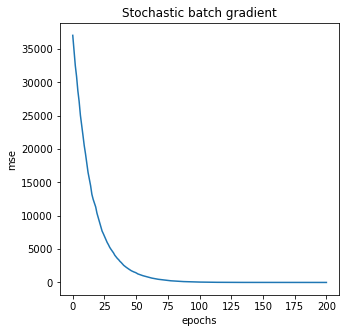

In [18]:
x = np.linspace(start = 0, stop = len(mse_sto_batch), num = len(mse_sto_batch))
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x, mse_sto_batch)
plt.xlabel("epochs")
plt.ylabel("mse")
plt.title("Stochastic batch gradient")
plt.show()

## Stochastic  Gradient

In [19]:
def stochastic_gradient(X_train,y_train,X_test,y_test,lr=0.0006, iteration = 200):
    # STOCHASTIC GRADIENT DESCENT

    # step :

    # choose an initial iterate w that belong to X_train.shape[1]
    w = np.random.rand(X_train.shape[1])

    mse_history = []

    # for k = 1,2,... do:
    for i in range(iteration):

        # Generate a random sample 
        number_of_rows = X_train.shape[0]
        sample_size = 1
        random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
        S = X_train[random_indices,:]
        ys = y_train[random_indices]

        # Compute a stochastic vector sv
        sv = objective_gradient_(S,ys,w)

        # Choose a stepsize alpha > 0 
        alpha = lr

        #Set the new iterate as w = w - alpha * sv
        w = w - alpha*sv

        # Compute the evaluation metrics
        pred = predict_1(X_test,w)
        mse = mean_squared_error(y_test,pred)
        print("epoch :",i, "mse :",mse)
        mse_history.append(mse)
        
    return mse_history

In [20]:
mse_sto = stochastic_gradient(X_train,y_train,X_test,y_test)

epoch : 0 mse : 40133.10588460568
epoch : 1 mse : 40122.41282757908
epoch : 2 mse : 40120.643192039606
epoch : 3 mse : 40104.895762835644
epoch : 4 mse : 40095.47497528648
epoch : 5 mse : 40094.458942562684
epoch : 6 mse : 40065.41578636082
epoch : 7 mse : 40022.879239872644
epoch : 8 mse : 40022.97753319449
epoch : 9 mse : 40007.69726501862
epoch : 10 mse : 40006.06817498321
epoch : 11 mse : 40005.51728647634
epoch : 12 mse : 39995.963629276215
epoch : 13 mse : 39994.17765951454
epoch : 14 mse : 39919.39130131663
epoch : 15 mse : 39897.72052471607
epoch : 16 mse : 39895.29564224454
epoch : 17 mse : 39850.249484133616
epoch : 18 mse : 39850.21603151197
epoch : 19 mse : 39849.17655702944
epoch : 20 mse : 39758.20101897138
epoch : 21 mse : 39747.35676077334
epoch : 22 mse : 39632.83688804612
epoch : 23 mse : 39625.85559259697
epoch : 24 mse : 39622.868462751125
epoch : 25 mse : 39622.09535840636
epoch : 26 mse : 39557.159446324644
epoch : 27 mse : 39486.67663435632
epoch : 28 mse : 39356

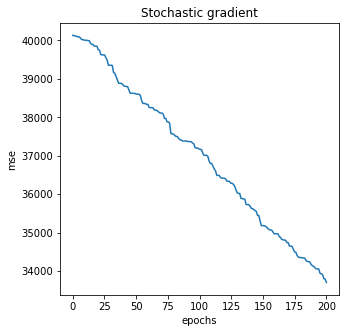

In [21]:
x = np.linspace(start = 0, stop = len(mse_sto), num = len(mse_sto))
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x, mse_sto)
plt.xlabel("epochs")
plt.ylabel("mse")
plt.title("Stochastic gradient")
plt.show()

## Agorithm 5.2.1 from Bottou et al Dynamic Sampling 

In [275]:
#np.trace(np.cov(set_grad(S,ys,w),rowvar=False))/S.shape[0] # OK 
# result looks ok compare to trace(cov)

In [274]:
#np.sum(np.var(set_grad(S,ys,w), axis = 0))/S.shape[0] # OK

In [ ]:
# remarks : Samples are drown without replacement from a set of (very large) size n_k
# What is verry large ? 

In [22]:
def dynamic_sampling_2(X_train,y_train,X_test,y_test,lr=0.07, iteration=200, batch=100):
    # Dynamic Sampling

    # step :

    # choose an initial iterate w that belong to X_train.shape[1]
    w = np.random.rand(X_train.shape[1])

    # Choose a stepsize alpha > 0 
    alpha = lr


    mse_history = []
    sample_size = batch

    # for k = 1,2,... do:
    for i in range(iteration):

        # Generate a random sample 
        number_of_rows = X_train.shape[0]
        random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
        S = X_train[random_indices,:]
        ys = y_train[random_indices]

        # Compute a stochastic vector sv
        sv = objective_gradient_(S,ys,w)

        squared_norm = (np.sum(np.square(sv)))*0.0000001

        varphi = np.trace(np.cov(set_grad(S,ys,w),rowvar=False))/S.shape[0] # OK 
        # result looks ok compare to trace(cov)



        if varphi <= squared_norm:
            print("varphi", varphi)
            print("squareed",squared_norm)
            number_of_rows = X_train.shape[0]
            random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
            S = X_train[random_indices,:]
            ys = y_train[random_indices]

        # Compute a stochastic vector sv
            sv = objective_gradient_(S,ys,w)

            #Set the new iterate as w = w - alpha * sv
            w = w - alpha*sv

            # Compute the evaluation metrics
            pred = predict_1(X_test,w)
            mse = mean_squared_error(y_test,pred)
            print("epoch :",i," mse :",mse)
            print("")
            mse_history.append(mse)
        else :
            sample_size = sample_size + 1
            print("sample size increase")
            number_of_rows = X_train.shape[0]
            random_indices = np.random.choice(number_of_rows, size=sample_size, replace=False)
            S = X_train[random_indices,:]
            ys = y_train[random_indices]

                #Set the new iterate as w = w - alpha * sv
            w = w - alpha*sv
                # Compute the evaluation metrics
            pred = predict_1(X_test,w)
            mse = mean_squared_error(y_test,pred)
            print("epoch :",i," mse :",mse)
            mse_history.append(mse)
            
    return mse_history

In [23]:
mse_ds_2 = dynamic_sampling_2(X_train,y_train,X_test,y_test)

varphi 0.17904024023083648
squareed 0.19199282295740858
epoch : 0  mse : 36926.20792501477

varphi 0.11238516060947182
squareed 0.12946524606906595
epoch : 1  mse : 34561.563323370225

varphi 0.1245725371720271
squareed 0.1408863633395357
epoch : 2  mse : 32358.103338604247

varphi 0.10656289250061836
squareed 0.11513470987944803
epoch : 3  mse : 30469.316100534834

varphi 0.10063615532003109
squareed 0.11012801985356291
epoch : 4  mse : 28230.64350847284

varphi 0.08963899282763287
squareed 0.09300247437261856
epoch : 5  mse : 26419.762067017688

varphi 0.14192035521711252
squareed 0.1656145780641235
epoch : 6  mse : 24472.83683095848

varphi 0.1056811370271316
squareed 0.12605086848140035
epoch : 7  mse : 23217.789739466927

varphi 0.10654454639830581
squareed 0.11189102117883101
epoch : 8  mse : 21817.202966604596

varphi 0.10861338610438154
squareed 0.11905301384224155
epoch : 9  mse : 20818.77444905731

varphi 0.07427230884891597
squareed 0.08636319848108397
epoch : 10  mse : 1960

epoch : 86  mse : 115.40353964099914

varphi 0.00046635189873701476
squareed 0.0004915366470951367
epoch : 87  mse : 107.10293243482394

varphi 0.00039381921223993196
squareed 0.00041409025403556297
epoch : 88  mse : 99.47581295421104

varphi 0.0004046856376787188
squareed 0.00045408599931844946
epoch : 89  mse : 91.4018418455678

varphi 0.0004261284673930126
squareed 0.0004923677486255937
epoch : 90  mse : 85.11266789935826

varphi 0.00026874373737673026
squareed 0.00030232613625239446
epoch : 91  mse : 80.51767375584485

varphi 0.00027156648130156603
squareed 0.0002785490252520004
epoch : 92  mse : 74.89095318844218

varphi 0.00023943236968216754
squareed 0.0002601043348702311
epoch : 93  mse : 69.52930634970198

varphi 0.0002926862186549462
squareed 0.0003052437189762232
epoch : 94  mse : 66.3621597325005

varphi 0.0002757827425032827
squareed 0.0002993387133520161
epoch : 95  mse : 62.33068214679847

varphi 0.0002322682145666173
squareed 0.0002462945509838465
epoch : 96  mse : 58.6

epoch : 169  mse : 0.37940931439778375

varphi 1.7532907195429307e-06
squareed 1.9314376266986423e-06
epoch : 170  mse : 0.3575776187970505

varphi 1.461974062500584e-06
squareed 1.6036110639639523e-06
epoch : 171  mse : 0.3317497246895321

varphi 1.4930105324401084e-06
squareed 1.706413483105959e-06
epoch : 172  mse : 0.3082562636502821

varphi 1.4565776116082628e-06
squareed 1.6788690774966411e-06
epoch : 173  mse : 0.29020668628559754

varphi 1.0704163182331497e-06
squareed 1.1711946171751295e-06
epoch : 174  mse : 0.27287146924116407

varphi 1.0614716527510063e-06
squareed 1.1300956928871144e-06
epoch : 175  mse : 0.2533033780313621

varphi 1.0177721254639157e-06
squareed 1.0937501252264475e-06
epoch : 176  mse : 0.23539856683905241

varphi 9.051696150576476e-07
squareed 9.116964708531779e-07
epoch : 177  mse : 0.21876763214610973

sample size increase
epoch : 178  mse : 0.20106802174006308
varphi 8.47110615588643e-07
squareed 9.380066972359481e-07
epoch : 179  mse : 0.185336584069

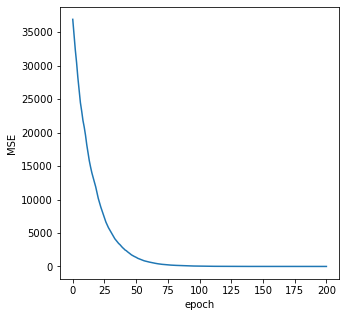

In [24]:
x = np.linspace(start = 0, stop = len(mse_ds_2),num = len(mse_ds_2))
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(xplot, mse_ds_2)
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.show()

# Result

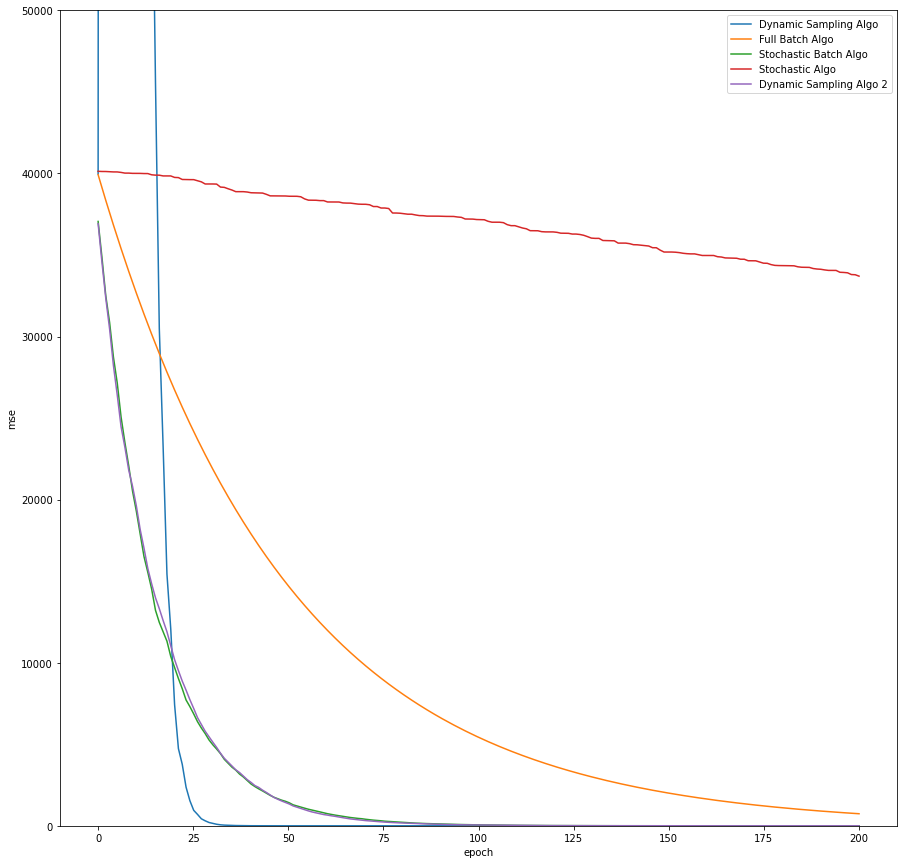

In [25]:
x = np.linspace(start = 0, stop = len(mse_ds_2), num = len(mse_ds_2))
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(xplot, mse_ds, label = "Dynamic Sampling Algo")
plt.plot(x, mse_fb, label = "Full Batch Algo")
plt.plot(x, mse_sto_batch,label = "Stochastic Batch Algo")
plt.plot(x,mse_sto,label = "Stochastic Algo")
plt.plot(xplot, mse_ds_2, label = "Dynamic Sampling Algo 2")
plt.ylim(0,50000)
plt.xlabel("epoch")
plt.ylabel("mse")
plt.legend()
plt.show()

We can observe that the Dynamic Sampling Algo give the faster convergence, whereas Dynamic Sampling Algo2, gives similar result with a stochastic batch algorithm. Moreover, the Dynamic Sampling Algo provide better result

**Reference :**

- Jorge Nocedal Yuchen Wu Richard H. Byrd, Gillian M.Chin.  Sample size selection in optimizationmethods for machine learning. pp. 127–155

- Léon Bottou, Frank E. Curtis, Jorge Nocedal, Optimization Methods for Large-Scale Machine Learning
